These scripts parses text looking for ability and skill checks and their DC.

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
def find_checks(filename):
    text = ""
    with open(filename, "r", encoding="utf-8") as textfile:
        text = ' '.join(textfile.readlines()).replace('\n', '')
    m = re.findall(r"\bDC (\d\d?)\b", text)
    return m

In [22]:
wbtw = find_checks('dnd_data/rawmodules/wbtw.txt')
# dc_list = [int(item.replace('DC ', '')) for item in wbtw]
dc_list = [int(result.group(1)) for result in wbtw]
labels = set(dc_list)
print(labels)
print(dc_list)

AttributeError: 'str' object has no attribute 'group'

In [15]:
dc_frame = pd.DataFrame(dc_list)
dc_frame.describe()

,0
count,187.000000
mean,14.422460
std,3.429494
min,8.000000
25%,12.000000
50%,15.000000
75%,15.500000
max,30.000000


In [18]:
data = {}
for item in labels:
    data[item] = dc_list.count(item)
print(data)

{8: 1, 9: 2, 10: 25, 11: 4, 12: 27, 13: 22, 14: 8, 15: 51, 16: 9, 17: 8, 18: 9, 19: 5, 20: 6, 22: 7, 24: 1, 25: 1, 30: 1}


<AxesSubplot:>

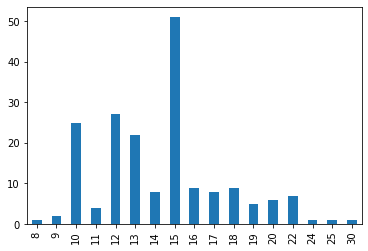

In [19]:
dc_results = pd.Series(data)
dc_results.plot.bar()